In [13]:
import time

import numpy as np
import mediapipe as mp
import cv2

In [75]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

def draw_styled_landmarks(image, results):
    # Draw face connections

    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [108]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while True:
        ret, frame = cap.read()
        if not ret:
            print('Failed to capture frame')
            exit(1)
        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)
        cv2.imshow('frame', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [87]:
lh = np.array([[res.x, res.y, res.visibility] for res in results.left_hand_landmarks.landmark]) if results.left_hand_landmarks else np.zeros(21*3)
lh[0]

0.0

In [135]:
def plot(x, y):
    import matplotlib.pyplot as plt

    # plot the left hand landmarks
    fig, ax = plt.subplots(1, 1)
    ax.scatter(x, y, marker='o', s=10)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Left Hand Landmarks')

    # make the scale of the plot consistent
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    plt.show()

In [111]:
lh = np.array([[res.x, res.y, res.visibility] for res in results.pose_landmarks.landmark if res.visibility]) if results.pose_landmarks else np.zeros(33*4)
lh

array([[ 2.26650715e-01,  4.90502685e-01,  9.99952376e-01],
       [ 2.58807808e-01,  4.05472398e-01,  9.99930382e-01],
       [ 2.85039425e-01,  3.97337347e-01,  9.99938488e-01],
       [ 3.07212204e-01,  3.90508175e-01,  9.99939501e-01],
       [ 1.80959791e-01,  4.26248521e-01,  9.99897122e-01],
       [ 1.57863379e-01,  4.32616740e-01,  9.99862432e-01],
       [ 1.40217289e-01,  4.37975079e-01,  9.99809504e-01],
       [ 3.38410556e-01,  4.17291224e-01,  9.99955833e-01],
       [ 1.18481681e-01,  4.72257584e-01,  9.99879956e-01],
       [ 2.86317438e-01,  5.64684451e-01,  9.99944866e-01],
       [ 1.87594295e-01,  5.85673392e-01,  9.99890208e-01],
       [ 5.24037182e-01,  7.90443420e-01,  9.99689400e-01],
       [ 4.59933504e-02,  9.14592087e-01,  9.90393937e-01],
       [ 9.55063939e-01,  7.93655515e-01,  9.57967758e-01],
       [-4.32237312e-02,  1.45783937e+00,  7.65766725e-02],
       [ 7.35094190e-01,  1.81925446e-01,  9.64611471e-01],
       [-3.34824398e-02,  1.89148271e+00

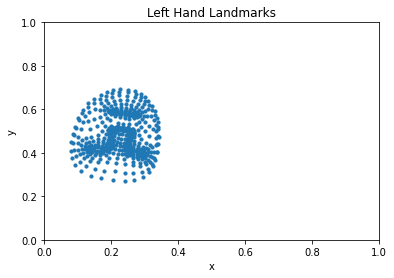

In [148]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]) if results.face_landmarks else np.zeros(468*3)
plot(face[:,0], face[:,1])

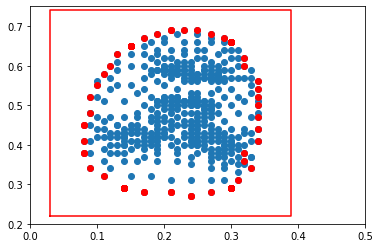

In [180]:
x_min = np.min(face[:,0]) - 0.05
x_max = np.max(face[:,0]) + 0.05
y_min = np.min(face[:,1]) - 0.05
y_max = np.max(face[:,1]) + 0.05

import matplotlib.pyplot as plt

# plot a rectangle around the face
plt.plot([x_min, x_min, x_max, x_max, x_min], [y_min, y_max, y_max, y_min, y_min], 'r')
plt.plot(face[:,0], face[:,1], 'o')

for y in np.linspace(y_min,y_max,20):
    x = x_min
    # get the closest point to (x, y)
    idx = np.argmin(np.abs(face[:,0] - x) + np.abs(face[:,1] - y))
    # plot a line from (x, y) to the closest point
    # plt.plot([x, face[idx,0]], [y, face[idx,1]], 'b')
    # make a red dot at the closest point
    plt.plot(face[idx,0], face[idx,1], 'ro')

for y in np.linspace(y_min,y_max,20):
    x = x_max
    # get the closest point to (x, y)
    idx = np.argmin(np.abs(face[:,0] - x) + np.abs(face[:,1] - y))
    # plot a line from (x, y) to the closest point
    # plt.plot([x, face[idx,0]], [y, face[idx,1]], 'b')
    plt.plot(face[idx,0], face[idx,1], 'ro')

for x in np.linspace(x_min,x_max,20):
    y = y_max
    # get the closest point to (x, y)
    idx = np.argmin(np.abs(face[:,0] - x) + np.abs(face[:,1] - y))
    # plot a line from (x, y) to the closest point
    # plt.plot([x, face[idx,0]], [y, face[idx,1]], 'b')
    plt.plot(face[idx,0], face[idx,1], 'ro')

for x in np.linspace(x_min,x_max,20):
    y = y_min
    # get the closest point to (x, y)
    idx = np.argmin(np.abs(face[:,0] - x) + np.abs(face[:,1] - y))
    # plot a line from (x, y) to the closest point
    # plt.plot([x, face[idx,0]], [y, face[idx,1]], 'b')
    plt.plot(face[idx,0], face[idx,1], 'ro')


plt.xlim(0, 0.5)
plt.ylim(0.2, 0.75)
plt.show()

In [151]:
np.linspace(0,1,11)


array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])